# Pymaceuticals Inc.
---

### Analysis

Mice are a good subsitute for testing drug effectiveness because their life span allows lifetime side effects as well as muligenerational side effects to be studied robustly. That being said I believe that Capomulin has the most promise for human trials.
 

In [23]:
#1 Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#2 Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#3 Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [24]:
mouse_metadata.columns
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [3]:
print(mouse_metadata.shape)
print(study_results.shape)

(249, 5)
(1893, 4)


In [25]:


#4 Combine the data into a single dataset
df1=pd.DataFrame(mouse_metadata)
df2=pd.DataFrame(study_results)
combined_df = pd.merge(df1,df2)
combined_df = combined_df[['Mouse ID','Timepoint', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
        'Tumor Volume (mm3)', 'Metastatic Sites']]
combined_df.columns



Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [30]:
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1


In [36]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouseid=combined_df.duplicated(subset=['Timepoint','Mouse ID'],keep=False)

#counts number of true dup_mouseid.sum()
dup_mouseid.sum()

10

# Optional: Get all the data for the duplicate mouse ID

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(subset=['Timepoint','Mouse ID'], keep=False)]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
908,g989,0,Propriva,Female,21,26,45.000000,0
909,g989,0,Propriva,Female,21,26,45.000000,0
910,g989,5,Propriva,Female,21,26,48.786801,0
911,g989,5,Propriva,Female,21,26,47.570392,0
912,g989,10,Propriva,Female,21,26,51.745156,0
913,g989,10,Propriva,Female,21,26,49.880528,0
914,g989,15,Propriva,Female,21,26,51.325852,1
915,g989,15,Propriva,Female,21,26,53.442020,0
916,g989,20,Propriva,Female,21,26,55.326122,1
917,g989,20,Propriva,Female,21,26,54.657650,1


In [37]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df[~combined_df.duplicated(subset=['Timepoint','Mouse ID'], keep=False)]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [29]:
#5 Checking the number of mice.
unique_mice =combined_df['Mouse ID'].nunique()
print(unique_mice)

249


In [42]:
#5 Display the data table for preview
combined_df =combined_df[~combined_df.duplicated(subset=['Timepoint','Mouse ID'], keep=False)] 
combined_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#created data to filter mean value then median etc.
mean_value=combined_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median_value=combined_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
variance_value=combined_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
std_value=combined_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sem_value=combined_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

summary_df=pd.DataFrame(
    {
        "Mean Tumor Volume":mean_value,
        "Median Tumor Volume":median_value,
        "Tumor Volume Variance":variance_value,
        "Tumor Volume Std. Dev.":std_value,
        "Tumor Volume Std. Err.":sem_value
    }
)
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_tbl = combined_df.groupby('Drug Regimen')
summary_stat= summary_tbl.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summary_stat



C:\Users\oscar\AppData\Local\Temp\ipykernel_12928\2743446575.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stat= summary_tbl.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

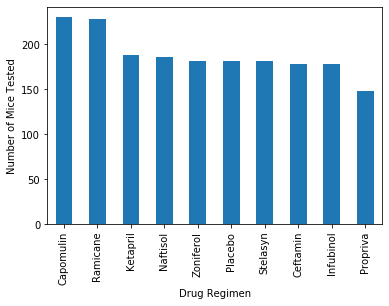

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



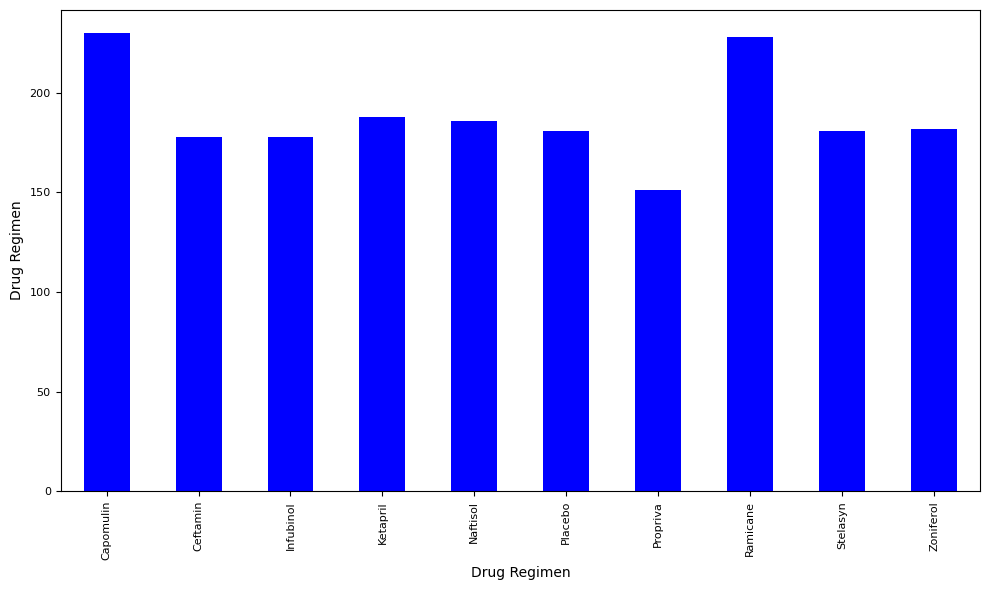

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_per_tret = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas =count_mice_per_tret.plot.bar(figsize =(10,6), color ='b',fontsize = 8)
count_mice_per_tret
plt.xlabel
plt.ylabel("Drug Regimen")
plt.title
plt.tight_layout()
plt.show()

count_mice_per_tret

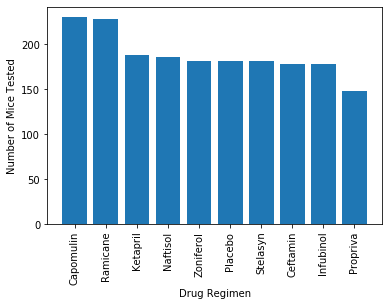

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [80]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_per_tret = (combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_per_tret
import numpy as np

Text(0, 0.5, 'Number of Mice')

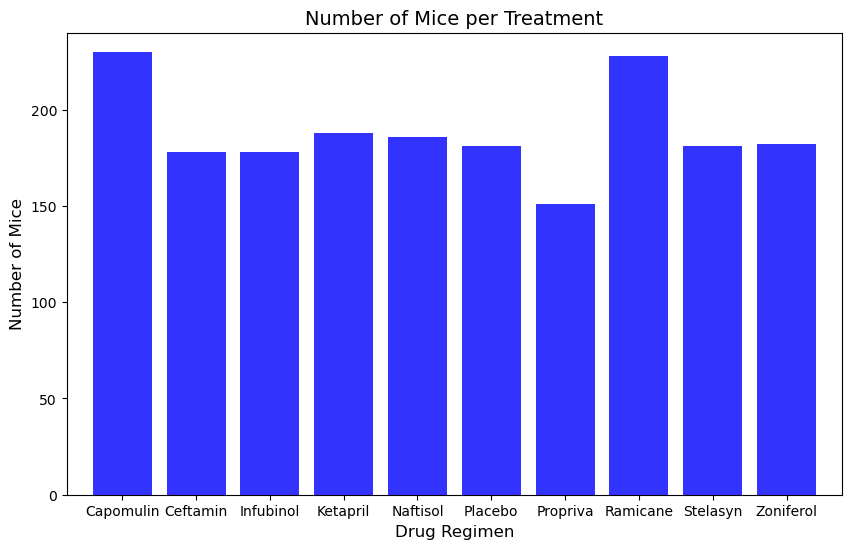

In [82]:

br=np.arange(len(mice_per_tret))
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.bar(br, mice_per_tret, color='b', alpha=0.8, align='center')
tick_locations = [value for value in br]
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])
plt.xlim(-0.75,len(br)-0.25)
plt.ylim(0,max(mice_per_tret)+10)
plt.title("Number of Mice per Treatment",fontsize=14)
plt.xlabel("Drug Regimen",fontsize=12 )
plt.ylabel("Number of Mice",fontsize=12 )



In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_set = combined_df.groupby(["Mouse ID","Sex"])
gender_set
gender_df=pd.DataFrame(gender_set.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns =["Total Count"]

mouse_gender["Percentage of Sex"]=(100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"]= mouse_gender["Percentage of Sex"]
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<function matplotlib.pyplot.show(close=None, block=None)>

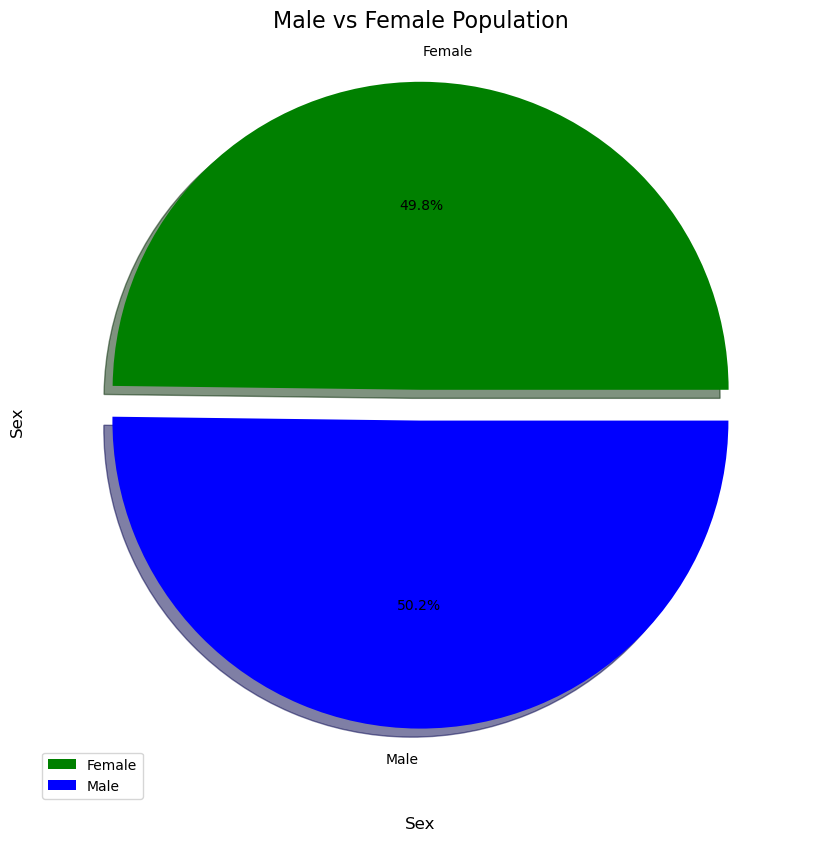

In [87]:
colors=['green','blue']
explode = (0.1,0)
plot =mouse_gender.plot.pie(y = 'Total Count',figsize=(15,10),colors=colors,explode=explode,shadow= True,autopct="%1.1f%%")

plt.title('Male vs Female Population', fontsize = 16)

plt.ylabel('Sex',fontsize=12)
plt.xlabel('Sex',fontsize=12)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

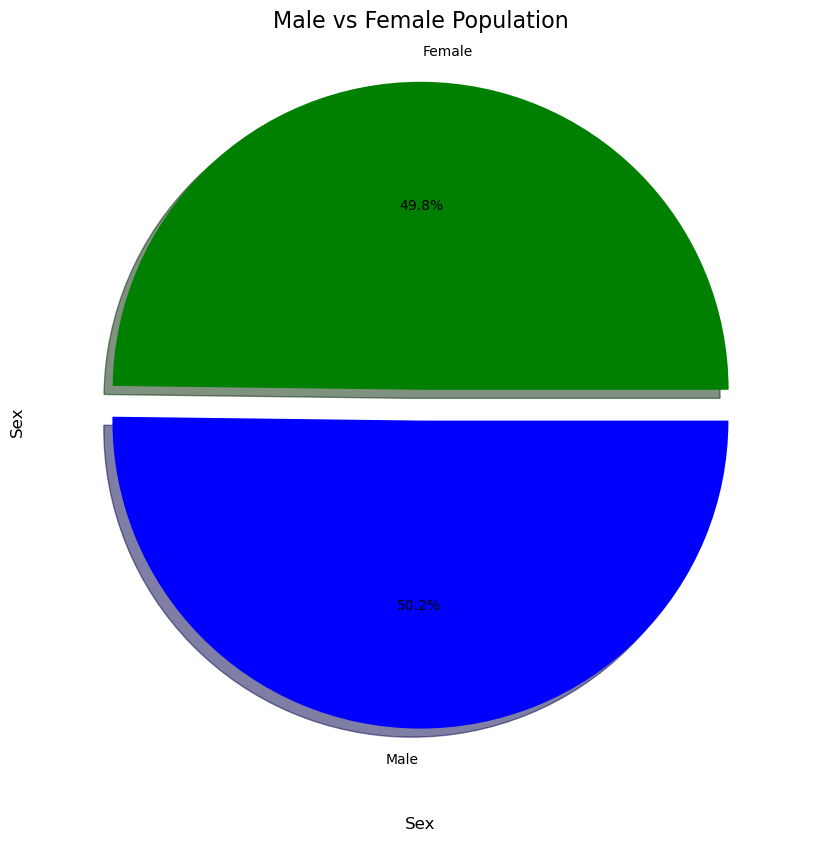

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Female","Male"]

sizes = [49.799197,50.200803]
colors = ['green','blue']
explode= (0.1,0)
fig1,ax1 =plt.subplots(figsize=(15,10))
plt.pie(sizes,explode=explode,labels =labels,colors=colors, autopct="%1.1f%%",shadow=True)
plt.title('Male vs Female Population', fontsize = 16)

plt.ylabel('Sex',fontsize=12)
plt.xlabel('Sex',fontsize=12)

plt.show


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin",:]
Ramicane_df=combined_df.loc[combined_df["Drug Regimen"]=="Ramicane",:]
Ceftamin_df=combined_df.loc[combined_df["Drug Regimen"]=="Ceftamin",:]	
Infubinol_df=combined_df.loc[combined_df["Drug Regimen"]=="Infubinol",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last=Capomulin_df.groupby("Mouse ID").max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol,combined_df, on=("Mouse ID", "Timepoint"), how ="left")
Capomulin_merge.head()




In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


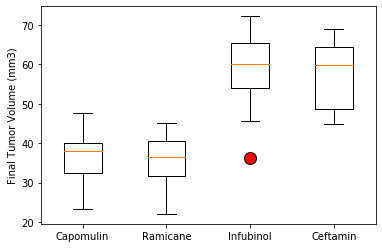

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

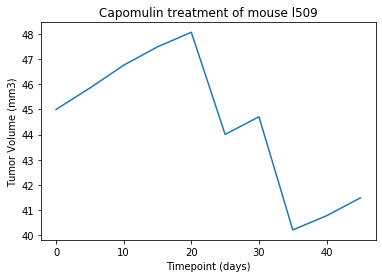

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



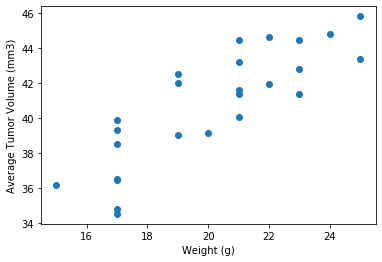

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


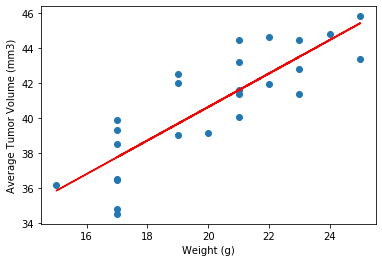

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

